In [113]:
import numpy as np
import pandas as pd
import datetime
#import scipy
#import math
from matplotlib.pyplot import figure

In [114]:
# apagar deposit,withdraw. Carregar no xlsx ou csv, apagar as ordens abertas. Se começar em ordem decrescente, inverter
df = pd.read_csv('Cyborg-Darwinex_deposit_with.csv',index_col='Open Date',parse_dates=True)
# - O operador de negação (~) exclui apenas essas linhas do DataFrame
cyb = df[~df["Action"].str.contains("Deposit|Withdrawal", case=False, na=False)]

In [115]:
cyb.columns

Index(['Close Date', 'Symbol', 'Action', 'Units/Lots', 'Open Price',
       'Close Price', 'Commission', 'Swap', 'Pips', 'Profit', 'Gain',
       'Duration (DD:HH:MM:SS)', 'Profitable(%)', 'Profitable(time duration)',
       'Drawdown', 'Risk:Reward', 'Max(pips)', 'Max(EUR)', 'Min(pips)',
       'Min(EUR)', 'Entry Accuracy(%)', 'Exit Accuracy(%)',
       'ProfitMissed(pips)', 'ProfitMissed(EUR)'],
      dtype='object')

In [116]:
cyb.head()
#cyb.tail()

,Close Date,Symbol,Action,Units/Lots,Open Price,Close Price,Commission,Swap,Pips,Profit,...,Drawdown,Risk:Reward,Max(pips),Max(EUR),Min(pips),Min(EUR),Entry Accuracy(%),Exit Accuracy(%),ProfitMissed(pips),ProfitMissed(EUR)
Open Date,,,,,,,,,,,,,,,,,,,,,
2023-12-20 22:16:00,12/21/2023 09:22,EURCAD,Sell,0.07,1.46119,1.46119,-0.35,0.10,0.0,-0.25,...,20.9,4.23,4.0,0.000,-16.9,0.000,19.1,80.9,-4.0,0.00
2023-12-20 23:22:00,12/21/2023 08:27,USDJPY,Buy,0.07,143.59800,143.10200,-0.32,2.90,-49.6,-19.58,...,83.1,19.31,4.1,1.845,-79.0,-35.550,4.9,35.4,-53.7,-24.17
2023-12-20 21:43:00,12/21/2023 01:49,EURAUD,Sell,0.10,1.62173,1.62443,-0.50,-1.51,-27.0,-18.63,...,46.0,26.11,1.7,1.054,-44.3,-27.466,3.7,37.6,-28.7,-17.79
2023-12-20 22:48:00,12/21/2023 01:46,AUDUSD,Buy,0.08,0.67344,0.67368,-0.25,-1.80,2.4,-0.29,...,12.6,4.07,3.1,2.263,-12.6,-9.198,19.7,95.5,-0.7,-0.51
2023-12-20 22:51:00,12/21/2023 01:00,EURUSD,Buy,0.09,1.09398,1.09440,-0.45,-3.01,4.2,-0.01,...,9.8,1.88,5.2,4.264,-9.8,-8.036,34.7,93.3,-1.0,-0.82


In [117]:
#  invertendo a ordem dos elementos.
cyb = cyb[::-1]

In [118]:
cyb.head()

,Close Date,Symbol,Action,Units/Lots,Open Price,Close Price,Commission,Swap,Pips,Profit,...,Drawdown,Risk:Reward,Max(pips),Max(EUR),Min(pips),Min(EUR),Entry Accuracy(%),Exit Accuracy(%),ProfitMissed(pips),ProfitMissed(EUR)
Open Date,,,,,,,,,,,,,,,,,,,,,
2017-07-03 00:57:00,07/03/2017 01:18,EURAUD,Sell,0.02,1.48693,1.48595,-0.10,0.00,9.8,1.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-04 00:25:00,07/04/2017 00:50,GBPCAD,Sell,0.02,1.68413,1.68306,-0.11,0.00,10.7,1.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-03 21:30:00,07/04/2017 00:55,GBPAUD,Buy,0.01,1.69015,1.69071,-0.06,-0.07,5.6,0.25,...,17.0,3.04,5.6,0.392,-17.0,-1.19,24.8,100.0,0.0,0.00
2017-07-04 22:24:00,07/04/2017 23:03,GBPAUD,Sell,0.01,1.70014,1.69896,-0.06,0.00,11.8,0.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-05 23:36:00,07/06/2017 01:00,GBPAUD,Buy,0.02,1.70017,1.70117,-0.11,-0.17,10.0,1.06,...,19.5,0.03,29.5,3.835,0.0,0.00,100.0,33.9,-19.5,-2.54


In [119]:
cyb.index

DatetimeIndex(['2017-07-03 00:57:00', '2017-07-04 00:25:00',
               '2017-07-03 21:30:00', '2017-07-04 22:24:00',
               '2017-07-05 23:36:00', '2017-07-05 23:38:00',
               '2017-07-06 21:41:00', '2017-07-06 23:33:00',
               '2017-07-06 23:19:00', '2017-07-06 23:12:00',
               ...
               '2023-12-13 21:15:00', '2023-12-14 22:48:00',
               '2023-12-14 23:00:00', '2023-12-19 22:10:00',
               '2023-12-18 23:23:00', '2023-12-20 22:51:00',
               '2023-12-20 22:48:00', '2023-12-20 21:43:00',
               '2023-12-20 23:22:00', '2023-12-20 22:16:00'],
              dtype='datetime64[ns]', name='Open Date', length=4396, freq=None)

In [120]:
print('Numero de retornos')
print(cyb['Gain'].count())

Numero de retornos
4396


In [121]:
print('Soma dos Gains (em decimais)')
print("%.2f" %cyb['Gain'].sum())

Soma dos Gains (em decimais)
165.03


In [122]:
LucroTotal = cyb['Profit'].sum()
print('Soma dos lucros')
print("%.2f" %LucroTotal)

Soma dos lucros
11240.87


<Axes: >

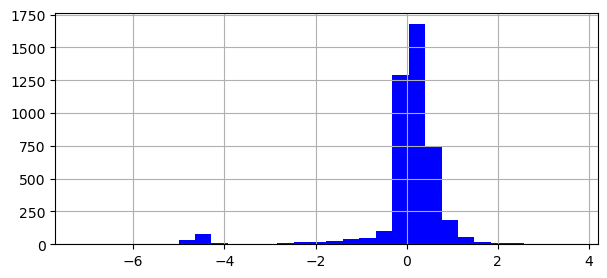

In [123]:
#fig=plt.figure(figsize=(8,6))
#his=fig.add_axes([0,0,1,1])
Gain = cyb['Gain']
Gain.hist(bins = 30, color = 'blue', figsize=(7,3))

<Axes: ylabel='Density'>

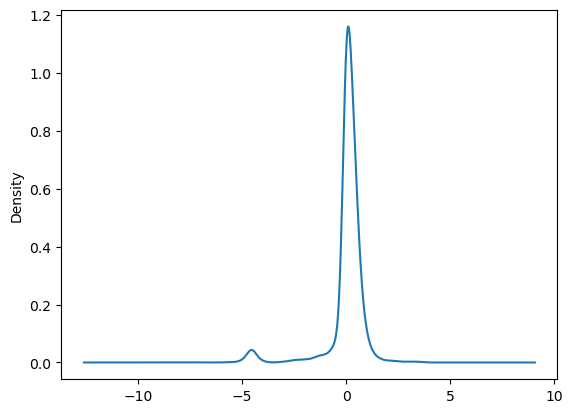

In [124]:
Gain.plot.kde()

<Axes: title={'center': 'Daily Gains'}, xlabel='Open Date'>

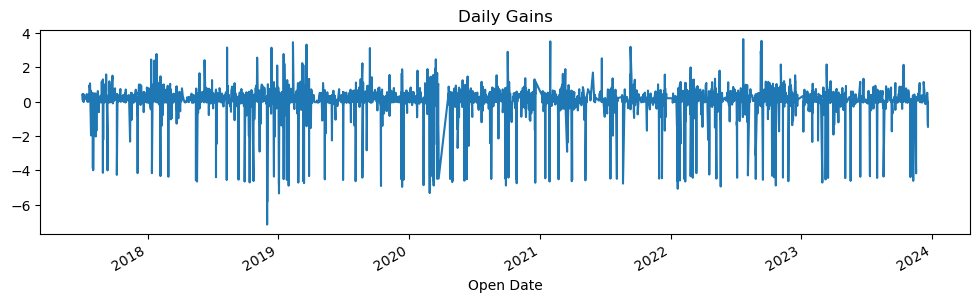

In [125]:
# Gráfico dos gains
Gain.plot(label='Gains',figsize=(12,3),title='Daily Gains')

<Axes: xlabel='Open Date'>

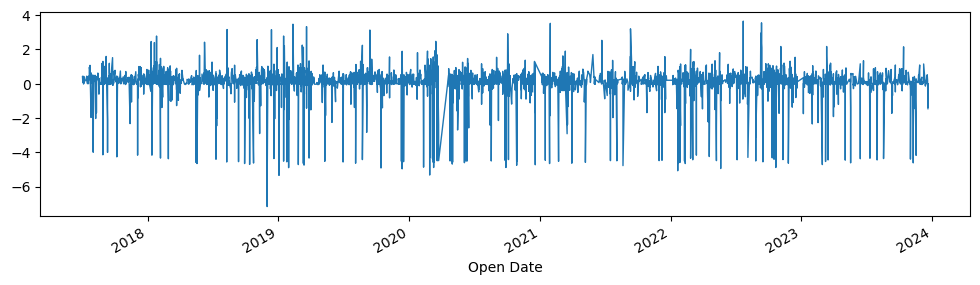

In [126]:
Gain.plot.line(x='Open Date',y='Gain',figsize=(12,3),lw=1)

<Axes: title={'center': 'Expectancy'}, xlabel='Open Date'>

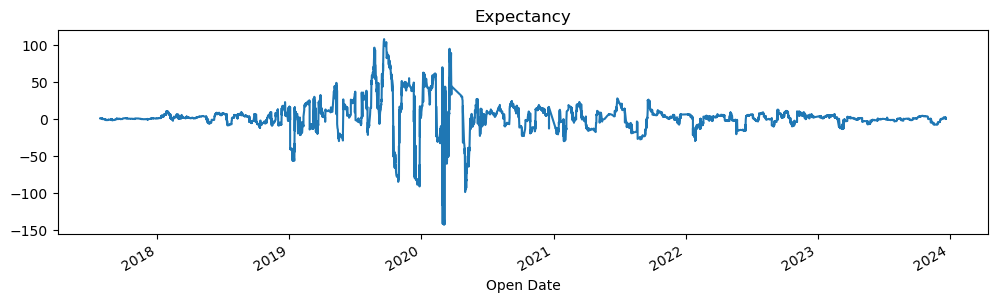

In [127]:
# Isolate the adjusted closing prices 
adj_profits_px = cyb['Profit']

# Calculate the moving average
Esp = adj_profits_px.rolling(window=30).mean()

# Inspect the result
# print(Esp[-10:])
# print(Esp)
Esp.plot.line(label='Curva',figsize=(12,3),title='Expectancy')

<Axes: title={'center': 'Curva de Capital'}, xlabel='Open Date'>

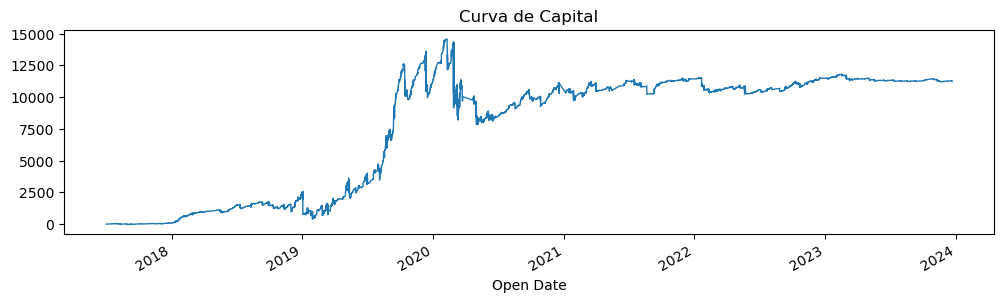

In [128]:
CurvaDeCapital = cyb['Profit Cumulative'] = cyb['Profit'].cumsum()
CurvaDeCapital.plot.line(x='Open Date',y='Profit',figsize=(12,3),lw=1,title='Curva de Capital')

<Axes: title={'center': 'Volume Negociado'}, xlabel='Open Date'>

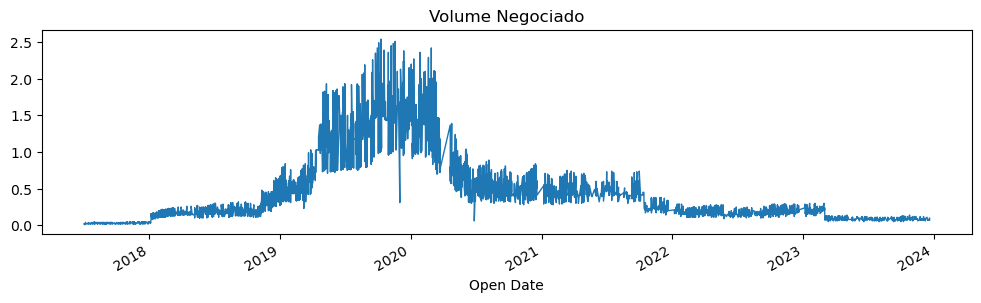

In [129]:
Volume = cyb['Units/Lots']
Volume.plot.line(x='Open Date',y='Units/Lots',figsize=(12,3),lw=1 ,title='Volume Negociado')

In [130]:
DepositoInicial = 15942.61

In [131]:
print(round(LucroTotal,2))

11240.87


In [132]:
Retorno = (LucroTotal / DepositoInicial) * 100
print("O retorno total durante o período foi de %.2f %%" %Retorno)

O retorno total durante o período foi de 70.51 %


In [133]:
data1 = datetime.date(day=3, month=7, year=2017)
data2 = datetime.date(day=21, month=12, year=2023)

diferenca = data2 - data1
n_meses = diferenca.days // 30
print(f"O período em meses foi de {n_meses} meses")

O período em meses foi de 78 meses


In [134]:
# Cálculo da taxa mensal
# https://conteudos.xpi.com.br/aprenda-a-investir/relatorios/juros-compostos/
# https://pt.wikipedia.org/wiki/Juro
i = (np.power((1 + LucroTotal/DepositoInicial), (1 / n_meses))) - 1
print("O retorno foi de %.2f%% ao mês" % round(i*100,2))

O retorno foi de 0.69% ao mês
